In [1]:
%pip install seaborn

**Week 2 - Sales & Customer Behaviour Insights - Andrea Aguirre**

Task 1. Load the Data

In [2]:
# Load all three CSVs into separate Pandas DataFrames 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('sales_data.csv')
product = pd.read_csv('product_info.csv')
customer = pd.read_csv('customer_info.csv')

print(sales)
print(product)
print(customer)

Matplotlib is building the font cache; this may take a moment.


     order_id customer_id product_id quantity  unit_price order_date  \
0     O966977      C00397      P0022        3       39.25   06-07-25   
1     O696648      C00236      P0023        5       18.92   06-07-25   
2     O202644      C00492      P0011        1       29.68   06-07-25   
3     O501803      C00031      P0003        1       32.76   06-07-25   
4     O322242      C00495      P0016        1       47.62   06-07-25   
...       ...         ...        ...      ...         ...        ...   
2995  O868860      C00233      P0001        5       43.40   06-07-25   
2996  O949709      C00246      P0029        4       34.04   06-07-25   
2997  O763639      C00182      P0026        1       42.34   06-07-25   
2998  O753958      C00074      P0003        5       35.96   06-07-25   
2999  O929624      C00405      P0004        3       43.23   06-07-25   

     delivery_status payment_method   region  discount_applied  
0          Delivered         PayPal  Central              0.00  
1    

Task 2. Clean the Data 

In [4]:
# Standardise text formatting using .str.strip(), .str.lower() or .str.title():
# First: 'sales_data.csv'

# Delivery status
sales['delivery_status'] = sales['delivery_status'].astype(str).str.lower().str.strip().replace({
    'DELAYED': 'Delayed',
    'delyd': 'Delayed',
    'delrd': 'Delivered',
    'delivered': 'Delivered'
})
sales['delivery_status'] = sales['delivery_status'].str.title()

# Payment method
sales['payment_method'] = sales['payment_method'].astype(str).str.lower().str.strip().replace({
    'credit card': 'Credit Card'
})
sales['payment_method'] = sales['payment_method'].str.title()

# Quantity
sales['quantity'] = sales['quantity'].astype(str).str.lower().str.strip().replace({
    'three': '3',
    'five' : '5'
        
})
sales['quantity'] = sales['quantity'].str.title()

print(sales['delivery_status'])
print(sales['payment_method'])
print(sales['quantity'])

0       Delivered
1         Delayed
2       Delivered
3       Cancelled
4         Delayed
          ...    
2995    Delivered
2996      Delayed
2997    Delivered
2998    Delivered
2999    Delivered
Name: delivery_status, Length: 3000, dtype: object
0              Paypal
1         Credit Card
2       Bank Transfer
3         Credit Card
4         Credit Card
            ...      
2995    Bank Transfer
2996    Bank Transfer
2997      Credit Card
2998      Credit Card
2999      Credit Card
Name: payment_method, Length: 3000, dtype: object
0       3
1       5
2       1
3       1
4       1
       ..
2995    5
2996    4
2997    1
2998    5
2999    3
Name: quantity, Length: 3000, dtype: object


In [5]:
# Convert order_date to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])
print(sales['order_date'])

0      2025-06-07
1      2025-06-07
2      2025-06-07
3      2025-06-07
4      2025-06-07
          ...    
2995   2025-06-07
2996   2025-06-07
2997   2025-06-07
2998   2025-06-07
2999   2025-06-07
Name: order_date, Length: 3000, dtype: datetime64[ns]


In [7]:
#  Handle missing values
missing_count1 = sales.isnull().sum()
print("Missing Values:\n", missing_count1)

data_filled1 = sales.copy()
# Fill where appropriate (e.g., discount_applied = 0.0)
data_filled1['discount_applied'] = data_filled1['discount_applied'].fillna(0.0)
data_filled1['quantity'] = data_filled1['quantity'].fillna(0)

# For categories, fill with "Unknown" or "Other" if appropriate 
data_filled1['delivery_status'] = data_filled1['delivery_status'].fillna('Unknown')
data_filled1['region'] = data_filled1['region'].fillna('Other')

# Drop only if necessary
data_dropped1 = sales.copy()
data_dropped1 = data_dropped1.dropna(subset=['order_id', 'customer_id', 'product_id', 'order_date'])

print("Replaced:\n", data_filled1)
print("Removed:\n", data_dropped1)

Missing Values:
 order_id              1
customer_id           2
product_id            5
quantity              0
unit_price            1
order_date            3
delivery_status       0
payment_method        0
region                0
discount_applied    517
dtype: int64
Replaced:
      order_id customer_id product_id quantity  unit_price order_date  \
0     O966977      C00397      P0022        3       39.25 2025-06-07   
1     O696648      C00236      P0023        5       18.92 2025-06-07   
2     O202644      C00492      P0011        1       29.68 2025-06-07   
3     O501803      C00031      P0003        1       32.76 2025-06-07   
4     O322242      C00495      P0016        1       47.62 2025-06-07   
...       ...         ...        ...      ...         ...        ...   
2995  O868860      C00233      P0001        5       43.40 2025-06-07   
2996  O949709      C00246      P0029        4       34.04 2025-06-07   
2997  O763639      C00182      P0026        1       42.34 2025-06-07   

I dropped order_id, customer_id, product_id and order_date because I can't specifically identify them, as they are important pieces of information, and I can't just put info like order_id =  O000000 and product_id = P0000 because each one is unique to the specific customer.

In [8]:
# Remove duplicates:  Use .duplicated() and .drop_duplicates() (e.g., by order_id)
duplicates1 = sales[sales.duplicated(subset='order_id')]

sales_before1 = sales.shape[0]
sales = sales.drop_duplicates(subset='order_id')
sales_no_dupes1 = sales_before1 - sales.shape[0]

print("\nDuplicates removed", sales_no_dupes1)


Duplicates removed 2


In [9]:
# Validate numeric columns: Ensure quantity, unit_price, and discount_applied are all non-negative 

sales['quantity'] = pd.to_numeric(sales['quantity'], errors='coerce')
sales['unit_price'] = pd.to_numeric(sales['unit_price'], errors='coerce')
sales['discount_applied'] = pd.to_numeric(sales['discount_applied'], errors='coerce')

print("Negative quantity count:", (sales['quantity'] < 0).sum())
print("Negative unit_price count:", (sales['unit_price'] < 0).sum())
print("Negative discount_applied count:", (sales['discount_applied'] < 0).sum())


Negative quantity count: 0
Negative unit_price count: 0
Negative discount_applied count: 0


In [10]:
# Second: 'product_info.csv'

# Base_price
product['base_price'] = pd.to_numeric(product['base_price'], errors='coerce')
product['base_price'] = product['base_price'].map('{:.2f}'.format)
print(product['base_price'])

0     15.88
1     34.23
2      7.92
3      9.13
4     31.10
5     36.06
6     33.63
7     31.96
8      8.00
9     17.72
10    11.08
11    14.67
12    36.52
13    13.22
14    39.21
15    26.71
16    16.46
17     6.08
18    30.30
19    30.27
20    20.23
21    19.77
22    36.04
23    26.33
24    15.24
25    27.06
26    23.05
27    34.28
28    23.41
29     9.77
Name: base_price, dtype: object


In [11]:
# Convert launch_date to datetime
product['launch_date'] = pd.to_datetime(product['launch_date'])
print(product['launch_date'])

<ipython-input-11-6a239a5ff56f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product['launch_date'] = pd.to_datetime(product['launch_date'])


0    2025-11-03
1    2024-08-18
2    2024-07-15
3    2025-04-19
4    2024-10-20
5    2024-09-10
6    2024-09-30
7    2024-08-29
8    2025-04-18
9    2024-08-14
10   2025-03-25
11   2025-04-19
12   2025-06-17
13   2025-02-02
14   2024-08-08
15   2025-02-20
16   2024-12-16
17   2024-07-18
18   2024-07-17
19   2024-11-08
20   2024-09-28
21   2024-04-10
22   2025-01-18
23   2025-02-24
24   2024-07-16
25   2025-08-02
26   2024-09-21
27   2025-10-04
28   2025-03-15
29   2025-04-04
Name: launch_date, dtype: datetime64[ns]


In [12]:
#  Handle missing values
missing_count2 = product.isnull().sum()
print("Missing Values:\n", missing_count2)
print("No missing values detected.")

Missing Values:
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
No missing values detected.


In [13]:
# Remove duplicates:  Use .duplicated() and .drop_duplicates() (e.g., by order_id)
duplicates2 = product[product.duplicated(subset='product_id')]

product_before2 = product.shape[0]
product = product.drop_duplicates(subset='product_id')
product_no_dupes2 = product_before2 - product.shape[0]

print("\nDuplicates removed", product_no_dupes2)


Duplicates removed 0


In [14]:
# Validate numeric columns: Ensure quantity, unit_price, and discount_applied are all non-negative 

product['base_price'] = pd.to_numeric(product['base_price'], errors='coerce')

print("Negative base_price count:", (product['base_price'] < 0).sum())


Negative base_price count: 0


In [15]:
# Standardise text formatting using .str.strip(), .str.lower() or .str.title():
# Third: 'customer_info.csv '

# Gender
customer['gender'] = customer['gender'].astype(str).str.lower().str.strip().replace({
    'male': 'Male',
    'FEMALE': 'Female',
    'femle': 'Female',
    'delivered': 'Delivered'
})
customer['gender'] = customer['gender'].str.title()

# Loyalty_tier
customer['loyalty_tier'] = customer['loyalty_tier'].astype(str).str.lower().str.strip().replace({
    'gold': 'Gold',
    'GOLD': 'Gold',
    'bronze': 'Bronze',
    'gld': 'Gold'
})
customer['loyalty_tier'] = customer['loyalty_tier'].str.title()

print(customer['gender'])
print(customer['loyalty_tier'])

0        Male
1      Female
2        Male
3      Female
4        Male
        ...  
495    Female
496       Nan
497      Male
498    Female
499      Male
Name: gender, Length: 500, dtype: object
0      Silver
1        Gold
2        Gold
3        Gold
4      Bronze
        ...  
495      Gold
496      Gold
497    Silver
498      Gold
499      Gold
Name: loyalty_tier, Length: 500, dtype: object


In [16]:
# Convert signup_date to datetime
customer['signup_date'] = pd.to_datetime(customer['signup_date'])
print(customer['signup_date'])

<ipython-input-16-326b50e715e2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['signup_date'] = pd.to_datetime(customer['signup_date'])


0     2025-04-26
1     2024-11-08
2     2025-05-15
3     2025-06-14
4     2025-02-05
         ...    
495   2025-02-19
496   2024-12-30
497   2025-06-21
498   2024-02-10
499   2024-11-28
Name: signup_date, Length: 500, dtype: datetime64[ns]


In [18]:
#  Handle missing values
missing_count3 = customer.isnull().sum()
print("Missing Values:\n", missing_count3)

customer_filled3 = customer.copy()

# For categories, fill with "Unknown" or "Other" if appropriate 
customer_filled3['gender'] = customer_filled3['gender'].fillna('Other')
customer_filled3['region'] = customer_filled3['region'].fillna('Other')

# Drop only if necessary
customer_dropped3 = customer.copy()
customer_dropped3 = customer_dropped3.dropna(subset=['customer_id', 'email', 'signup_date'])

print("Replaced:\n", customer_filled3)
print("Removed:\n", customer_dropped3)

Missing Values:
 customer_id     3
email           6
signup_date     4
gender          0
region          3
loyalty_tier    0
dtype: int64
Replaced:
     customer_id                      email signup_date  gender   region  \
0        C00001     shaneramirez@gmail.com  2025-04-26    Male  Central   
1        C00002      jpeterson@bernard.com  2024-11-08  Female  Central   
2        C00003    howardmaurice@yahoo.com  2025-05-15    Male  Central   
3        C00004        yherrera@arnold.org  2025-06-14  Female  Central   
4        C00005    janetwilliams@gmail.com  2025-02-05    Male     West   
..          ...                        ...         ...     ...      ...   
495      C00496         simsjohn@wiley.net  2025-02-19  Female  Central   
496      C00497  cameronwilliams@yahoo.com  2024-12-30     Nan     West   
497      C00498          ibarron@yahoo.com  2025-06-21    Male    South   
498      C00499          karen26@gmail.com  2024-02-10  Female    North   
499      C00500   jasonjoh

I dropped customer_id, 'email, and signup_date because these fields are essential and unique identifiers. Like the first Dataframe.

In [19]:
# Remove duplicates:  Use .duplicated() and .drop_duplicates() (e.g., by order_id)
duplicates3 = customer[customer.duplicated(subset='customer_id')]

customer_before3 = customer.shape[0]
customer = customer.drop_duplicates(subset='customer_id')
customer_no_dupes3 = customer_before3 - customer.shape[0]

print("\nDuplicates removed", customer_no_dupes3)


Duplicates removed 2


Task 3. Merge the Data 

In [20]:
# Merge sales_data with product_info using product_id 
df_merged = pd.merge(sales, product, on='product_id', how='left')
df_merged

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,product_name,category,launch_date,base_price,supplier_code
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907
2,O202644,C00492,P0011,1.0,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645
3,O501803,C00031,P0003,1.0,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
4,O322242,C00495,P0016,1.0,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,O868860,C00233,P0001,5.0,43.40,2025-06-07,Delivered,Bank Transfer,West,0.20,Storage Product 39,Storage,2025-11-03,15.88,S339
2994,O949709,C00246,P0029,4.0,34.04,2025-06-07,Delayed,Bank Transfer,West,0.20,Cleaning Product 69,Cleaning,2025-03-15,23.41,S424
2995,O763639,C00182,P0026,1.0,42.34,2025-06-07,Delivered,Credit Card,South,0.00,Storage Product 50,Storage,2025-08-02,27.06,S952
2996,O753958,C00074,P0003,5.0,35.96,2025-06-07,Delivered,Credit Card,Central,0.00,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745


In [21]:
# Then merge the result with customer_info using customer_id
merged_df = pd.merge(df_merged, customer, on='customer_id', how='left')
merged_df

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,O868860,C00233,P0001,5.0,43.40,2025-06-07,Delivered,Bank Transfer,West,0.20,Storage Product 39,Storage,2025-11-03,15.88,S339,ryanbartlett@guerra.com,2024-01-11,Other,Central,Silver
2994,O949709,C00246,P0029,4.0,34.04,2025-06-07,Delayed,Bank Transfer,West,0.20,Cleaning Product 69,Cleaning,2025-03-15,23.41,S424,brandywilliams@simpson-khan.info,2024-10-24,Male,South,Gold
2995,O763639,C00182,P0026,1.0,42.34,2025-06-07,Delivered,Credit Card,South,0.00,Storage Product 50,Storage,2025-08-02,27.06,S952,michael23@thomas.com,2025-02-24,Other,South,Gold
2996,O753958,C00074,P0003,5.0,35.96,2025-06-07,Delivered,Credit Card,Central,0.00,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,shawnrogers@yahoo.com,2024-10-22,Male,North,Bronze


In [22]:
# Inspect merged_df using .info() and .head() to confirm merge success 
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2997 non-null   object        
 1   customer_id       2996 non-null   object        
 2   product_id        2993 non-null   object        
 3   quantity          2995 non-null   float64       
 4   unit_price        2997 non-null   float64       
 5   order_date        2995 non-null   datetime64[ns]
 6   delivery_status   2998 non-null   object        
 7   payment_method    2998 non-null   object        
 8   region_x          2998 non-null   object        
 9   discount_applied  2481 non-null   float64       
 10  product_name      2993 non-null   object        
 11  category          2993 non-null   object        
 12  launch_date       2993 non-null   datetime64[ns]
 13  base_price        2993 non-null   float64       
 14  supplier_code     2993 n

Task 4. Feature Engineering

In [23]:
# revenue = quantity × unit_price × (1 - discount_applied) 
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])
print(merged_df[['revenue']])

      revenue
0     117.750
1      94.600
2      25.228
3      26.208
4      38.096
...       ...
2993  173.600
2994  108.928
2995   42.340
2996  179.800
2997  116.721

[2998 rows x 1 columns]


In [24]:
# order_week = ISO week from order_date 
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week
print(merged_df[['order_date', 'order_week']])

     order_date  order_week
0    2025-06-07          23
1    2025-06-07          23
2    2025-06-07          23
3    2025-06-07          23
4    2025-06-07          23
...         ...         ...
2993 2025-06-07          23
2994 2025-06-07          23
2995 2025-06-07          23
2996 2025-06-07          23
2997 2025-06-07          23

[2998 rows x 2 columns]


In [25]:
# price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30) 
bins = [float('-inf'), 15, 30, float('inf')]
labels = ['Low', 'Medium', 'High']
merged_df['price_band'] = pd.cut(merged_df['unit_price'], bins=bins, labels=labels)
print(merged_df[['unit_price', 'price_band']])

      unit_price price_band
0          39.25       High
1          18.92     Medium
2          29.68     Medium
3          32.76       High
4          47.62       High
...          ...        ...
2993       43.40       High
2994       34.04       High
2995       42.34       High
2996       35.96       High
2997       43.23       High

[2998 rows x 2 columns]


In [26]:
# days_to_order = Days between launch_date and order_date 
merged_df['launch_date'] = pd.to_datetime(merged_df['launch_date'], errors='coerce')
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days
print(merged_df[['order_date', 'launch_date', 'days_to_order']])

     order_date launch_date  days_to_order
0    2025-06-07  2024-04-10          423.0
1    2025-06-07  2025-01-18          140.0
2    2025-06-07  2025-03-25           74.0
3    2025-06-07  2024-07-15          327.0
4    2025-06-07  2025-02-20          107.0
...         ...         ...            ...
2993 2025-06-07  2025-11-03         -149.0
2994 2025-06-07  2025-03-15           84.0
2995 2025-06-07  2025-08-02          -56.0
2996 2025-06-07  2024-07-15          327.0
2997 2025-06-07  2025-04-19           49.0

[2998 rows x 3 columns]


In [27]:
# email_domain = Extract domain from email (e.g., gmail.com) 
merged_df['email_domain'] = merged_df['email'].str.split('@').str[-1].fillna('Unknown')
print(merged_df[['email', 'email_domain']])

                                 email       email_domain
0     jacquelinemartin@mills-logan.com    mills-logan.com
1               georgeweber@morgan.com         morgan.com
2              lcook@walters-smith.com  walters-smith.com
3                     smoore@gmail.com          gmail.com
4         mcclainkatherine@hotmail.com        hotmail.com
...                                ...                ...
2993           ryanbartlett@guerra.com         guerra.com
2994  brandywilliams@simpson-khan.info  simpson-khan.info
2995              michael23@thomas.com         thomas.com
2996             shawnrogers@yahoo.com          yahoo.com
2997          djones@ayala-collins.com  ayala-collins.com

[2998 rows x 2 columns]


In [28]:
# is_late = True if delivery_status is "Delayed" 
merged_df['is_late'] = merged_df['delivery_status'].str.lower() == 'delayed'
print(merged_df[['delivery_status', 'is_late']])

     delivery_status  is_late
0          Delivered    False
1            Delayed     True
2          Delivered    False
3          Cancelled    False
4            Delayed     True
...              ...      ...
2993       Delivered    False
2994         Delayed     True
2995       Delivered    False
2996       Delivered    False
2997       Delivered    False

[2998 rows x 2 columns]


Task 5. Create Summary Tables

In [29]:
# Weekly revenue trends by region 

weekly_revenue = merged_df.groupby(['region_x', 'region_y', 'order_week']).agg(total_revenue=('revenue', 'sum'))
print(weekly_revenue)

                              total_revenue
region_x region_y order_week               
Central  Central  23              5618.7830
         East     23              7694.1605
         North    23              8553.8745
         South    23              6885.8005
         West     23              7947.9020
East     Central  23              6406.0925
         East     23              8451.4390
         North    23              6871.6390
         South    23              7919.9075
         West     23              8731.9640
North    Central  23              7334.5375
         East     23              7813.2865
         North    23              8054.9355
         South    23              6902.0275
         West     23              7254.3725
South    Central  23              8451.9320
         East     23              6813.2855
         North    23              8058.1715
         South    23              7252.8005
         West     23              9160.7355
West     Central  23            

In [30]:
# Product category performance (revenue, quantity, discount)
product_performance = merged_df.groupby('category').agg(total_revenue=('revenue', 'sum'), total_quantity=('quantity', 'sum'), avg_discount=('discount_applied', 'mean'))
print(product_performance)

               total_revenue  total_quantity  avg_discount
category                                                  
Cleaning          75483.8140          3589.0      0.103353
Kitchen           25642.7460          1226.0      0.095298
Outdoors          32932.6280          1523.0      0.097770
Personal Care     21412.1665           902.0      0.103557
Storage           38198.2375          1733.0      0.097286


In [31]:
# Customer behaviour by loyalty_tier and signup_month 
customer_behavior = merged_df.groupby(['loyalty_tier', 'signup_date']).agg(total_revenue=('revenue', 'sum'), total_orders=('order_id', 'count'), avg_discount=('discount_applied', 'mean'))
print(customer_behavior)

                          total_revenue  total_orders  avg_discount
loyalty_tier signup_date                                           
Brnze        2024-07-20        478.4645             8      0.100000
             2025-04-19        290.0715             3      0.050000
Bronze       2024-01-09        395.3360             7      0.078571
             2024-01-10         83.3090             3      0.150000
             2024-02-10        554.1580            13      0.163636
...                                 ...           ...           ...
Silver       2025-07-06        281.2620             5      0.100000
             2025-08-03        301.1865             5      0.100000
             2025-10-06        779.1735            10      0.112500
             2025-12-02        458.7190            12      0.162500
Sllver       2025-02-21        777.3595             6      0.133333

[380 rows x 3 columns]


In [32]:
# Delivery performance by region and price_band 
delivery_performance = merged_df.groupby(['region_x', 'region_y', 'price_band']).agg(total_orders=('order_id', 'count'), delayed_orders=('is_late', 'sum'))
delivery_performance['delay_rate'] = delivery_performance['delayed_orders'] / delivery_performance['total_orders']
print(delivery_performance)

<ipython-input-32-d48b99255cd5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_performance = merged_df.groupby(['region_x', 'region_y', 'price_band']).agg(total_orders=('order_id', 'count'), delayed_orders=('is_late', 'sum'))


                              total_orders  delayed_orders  delay_rate
region_x region_y price_band                                          
Central  Central  Low                   18               7    0.388889
                  Medium                45              20    0.444444
                  High                  40              20    0.500000
         East     Low                   21               7    0.333333
                  Medium                37               9    0.243243
...                                    ...             ...         ...
nrth     South    Medium                 1               0    0.000000
                  High                   0               0         NaN
         West     Low                    0               0         NaN
                  Medium                 0               0         NaN
                  High                   0               0         NaN

[90 rows x 3 columns]


In [37]:
# Preferred payment methods by loyalty_tier 
payment_methods = (merged_df.groupby(['loyalty_tier', 'payment_method']).size().reset_index(name='count'))
payment_pivot = payment_methods.pivot_table(index='loyalty_tier', columns='payment_method',values='count',fill_value=0)
print(payment_pivot)

payment_method  Bank Transfer  Bank Transfr  Credit Card  Nan  Paypal
loyalty_tier                                                         
Brnze                     2.0           0.0          5.0  0.0     4.0
Bronze                  178.0           0.0        279.0  0.0   160.0
Gold                    404.0           1.0        841.0  2.0   429.0
Nan                       0.0           0.0          6.0  0.0     3.0
Silver                  191.0           0.0        300.0  1.0   162.0
Sllver                    0.0           0.0          6.0  0.0     0.0


Task 6. Visual Exploration

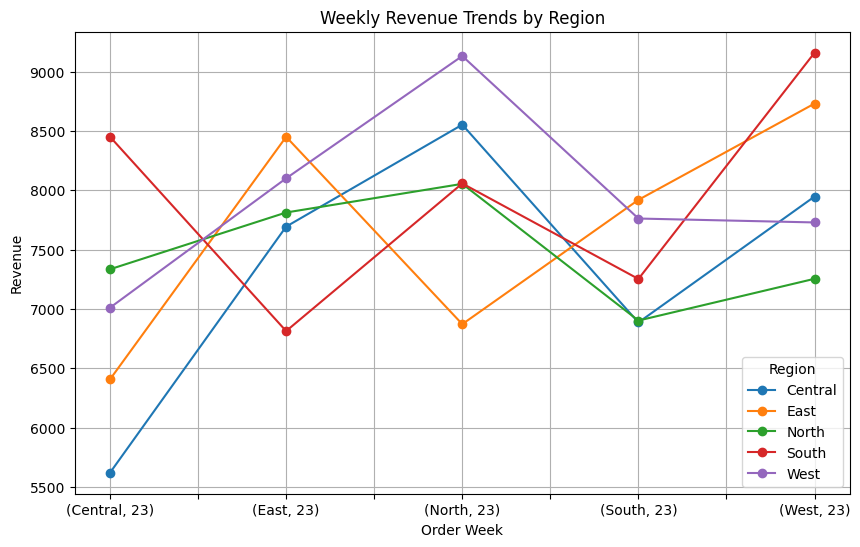

In [39]:
# 1. Line plot - weekly revenue trends by region 
weekly = merged_df.groupby(['region_x', 'region_y', 'order_week'])['revenue'].sum().unstack('region_x', 'region_y')

weekly.plot(figsize=(10,6), marker='o')
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('Order Week')
plt.ylabel('Revenue')
plt.legend(title='Region')
plt.grid(True)
plt.show()

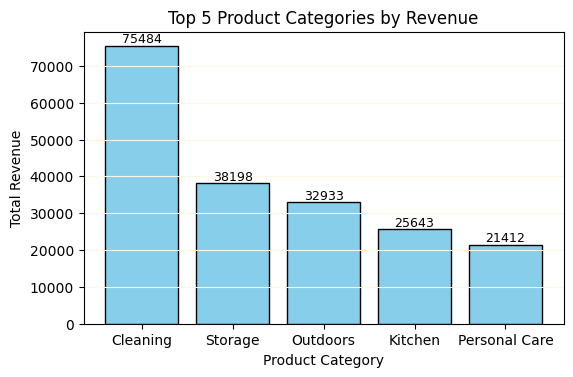

In [45]:
# 2. Bar chart - top 5 categories by revenue
# Get top 5 categories by revenue
top_categories = (merged_df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(5).reset_index())

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(top_categories['category'], top_categories['revenue'], color='skyblue', edgecolor='black')

ax.set_title('Top 5 Product Categories by Revenue')
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Revenue')
ax.grid(True, axis='y', color='#fdf6e3')

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, 
            f'{height:.0f}', ha='center', va='bottom', fontsize=9)

plt.subplots_adjust(left=0.15, right=0.95, top=0.88, bottom=0.15)
plt.show()

<ipython-input-50-0074c36fecf6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='discount_applied', data=merged_df, palette='pastel')


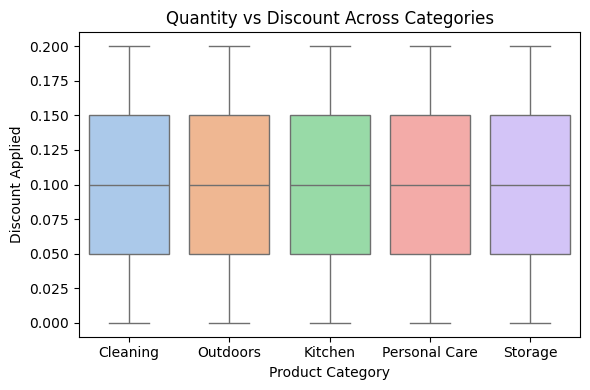

In [50]:
# 3. Boxplot - quantity vs discount across categories
plt.figure(figsize=(6, 4))
sns.boxplot(x='category', y='discount_applied', data=merged_df, palette='pastel')
plt.title('Quantity vs Discount Across Categories')
plt.xlabel('Product Category')
plt.ylabel('Discount Applied')
plt.tight_layout()
plt.show()

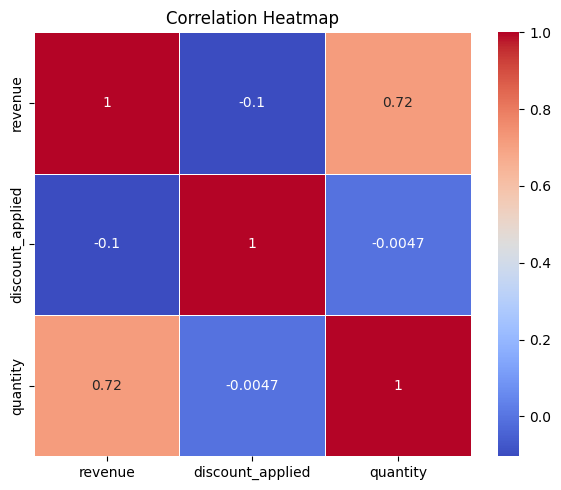

In [52]:
# 4. Heatmap - correlation between revenue, discount, and quantity
corr = merged_df[['revenue', 'discount_applied', 'quantity']].corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

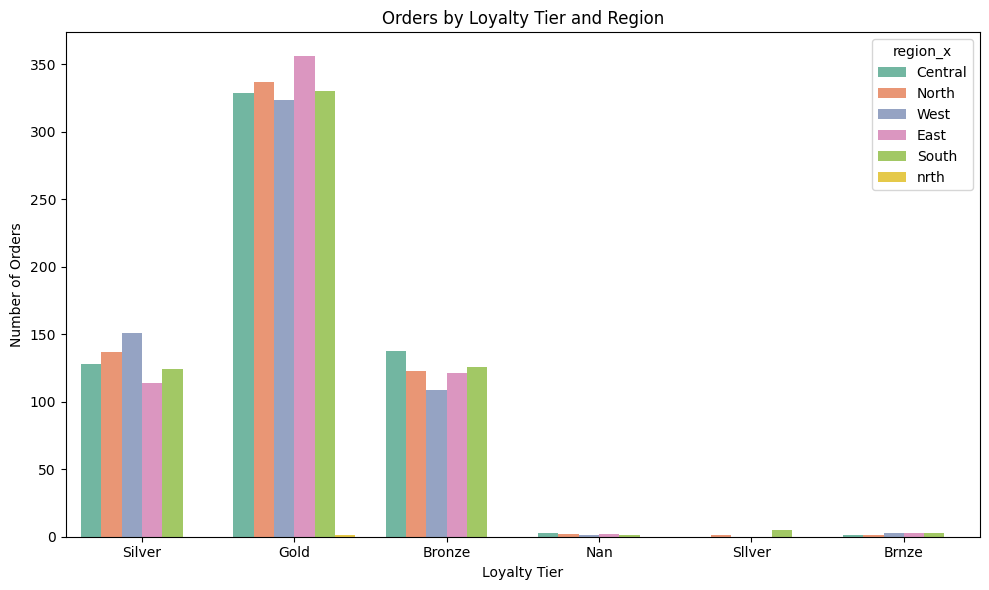

In [53]:
# 5. Countplot - orders by loyalty tier (with hue = region)
plt.figure(figsize=(10, 6))
sns.countplot(x='loyalty_tier',hue='region_x',     data=merged_df,palette='Set2')
plt.title('Orders by Loyalty Tier and Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

<ipython-input-56-e369ca158a62>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_counts = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)


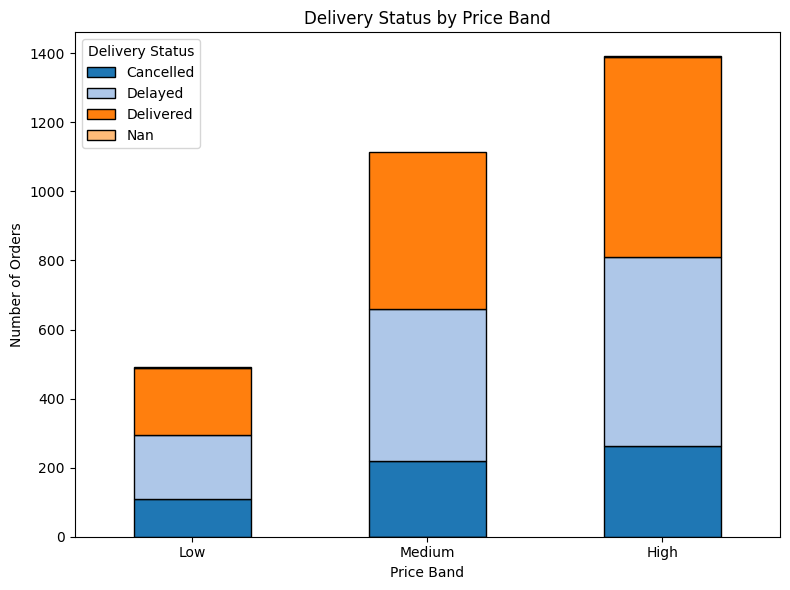

In [56]:
# 6. Stacked bar or pie - delivery status by price band
delivery_counts = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)

palette = sns.color_palette("tab20", n_colors=len(delivery_counts.columns))

ax = delivery_counts.plot(kind='bar',stacked=True,figsize=(8, 6),color=palette,edgecolor='black')

plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()